# Palette

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import colorsys
import matplotlib.colors as mcolors

In [2]:
def get_hls(color):
    """
    Returns the HLS values of a given color.
    
    Args:
        color (str or tuple): A color name (e.g., 'xkcd:hot pink', 'tab:orange'), a hex code (e.g., '#FF69B4'), or an RGB triplet (e.g., (255, 105, 180)).
    
    Returns:
        tuple: A tuple containing the HLS values (hue, lightness, saturation) of the given color.
    """
    try:
        # Convert the input color to RGB
        if isinstance(color, str):
            # If the input is a color name, convert it to RGB
            rgb = mcolors.to_rgb(color)
        elif isinstance(color, tuple) and len(color) == 3:
            # If the input is an RGB triplet, use it directly
            rgb = color
        else:
            # If the input is a hex code, convert it to RGB
            rgb = mcolors.to_rgb(color)
        
        # Convert RGB to HSL
        r, g, b = rgb
        hls = colorsys.rgb_to_hls(r, g, b)
        
        return hls
    
    except ValueError as e:
        print(f"Error: {e}")
        return None

def get_hls2(color):
    """
    Returns the HLS values of a given color.
    
    Args:
        color (str or tuple): A color name (e.g., 'xkcd:hot pink', 'tab:orange'), a hex code (e.g., '#FF69B4'), or an RGB triplet (e.g., (255, 105, 180)).
    
    Returns:
        tuple: A tuple containing the HLS values (hue, lightness, saturation) of the given color.
    """
    try:
        # Convert the input color to RGB
        if isinstance(color, str):
            # If the input is a color name, convert it to RGB
            rgb = mcolors.to_rgb(color)
            rgb = [int(val * 255) for val in rgb]
        elif isinstance(color, tuple) and len(color) == 3:
            # If the input is an RGB triplet, use it directly
            rgb = color
        else:
            # If the input is a hex code, convert it to RGB
            rgb = mcolors.to_rgb(color)
            rgb = [int(val * 255) for val in rgb]
        
        # Convert RGB to HSL
        r, g, b = rgb
        hls = colorsys.rgb_to_hls(r / 255, g / 255, b / 255)
        
        return hls
    
    except ValueError as e:
        print(f"Error: {e}")
        return None

def new_range(l):
    r = np.arange(-1.0, 1.1, 0.1) + l
    return r[(r<=1.0) & (r>=0.0)]

def rgb_to_hex(rgb):
    return '#{:02x}{:02x}{:02x}'.format(int(rgb[0]*255), int(rgb[1]*255), int(rgb[2]*255))

def plot_panel(c, type, ax):
    """
    type=0 : hue
    type=1 : lightness
    type=2 : saturation
    """
    r = new_range(c[type])
    if type == 0:
        a_rgb = [colorsys.hls_to_rgb( *((ri, c[1], c[2]) ) ) for ri in r]
        type_name = "hue"
    if type == 1:
        a_rgb = [colorsys.hls_to_rgb( *((c[0], ri, c[2]) ) ) for ri in r]
        type_name = "lightness"
    if type == 2:
        a_rgb = [colorsys.hls_to_rgb( *((c[0], c[1], ri) ) ) for ri in r]
        type_name = "saturation"
    a_hex = [rgb_to_hex(i) for i in a_rgb]
    ax[type].imshow([a_rgb], interpolation='none')
    # Minor ticks
    ax[type].set_xticks(np.arange(-.5, len(a_rgb), 1), minor=True)
    # Gridlines based on minor ticks
    ax[type].grid(which='minor', color='w', linestyle='-', linewidth=2)
    # Remove minor ticks
    ax[type].tick_params(which='minor', bottom=False, left=False)

    ax[type].set_xticks(np.arange(len(a_rgb)))
    ax[type].set_xticklabels(a_hex, rotation=30);
    ax[type].set_yticks([])
    ax[type].text(1.02, 0.5, type_name, transform=ax[type].transAxes,
         horizontalalignment='left', verticalalignment='center',
         fontweight="bold")
    mask = np.abs(r-c[type])< 1.0e-8
    idx = np.argwhere(mask)
    ax[type].plot(idx[0], [0], marker='o', markersize=20, markerfacecolor='None', markeredgecolor="white")
    return a_hex

def pallete(color_name):
    fig, ax = plt.subplots(3, 1, figsize=(10,6))
    c = get_hls(color_name)
    hex_codes = plot_panel(c, 0, ax)
    print("hue array:\n", hex_codes)
    hex_codes = plot_panel(c, 1, ax)
    print("lightness array:\n", hex_codes)
    hex_codes = plot_panel(c, 2, ax)
    print("saturation array:\n", hex_codes)
    ax[0].set_title("color = " + color_name)
    return fig

hue array:
 ['#a00900', '#a06800', '#77a000', '#18a000', '#00a048', '#0097a0', '#0038a0', '#2900a0', '#8800a0', '#a00058']
lightness array:
 ['#000703', '#003a1a', '#006d31', '#009f48', '#01d260', '#09fd77', '#3cfd93', '#6efeaf', '#a1fecb', '#d4fee7']
saturation array:
 ['#49574f', '#415f4f', '#39674e', '#316f4d', '#29774c', '#217f4c', '#19874b', '#118f4a', '#099749', '#019f48']


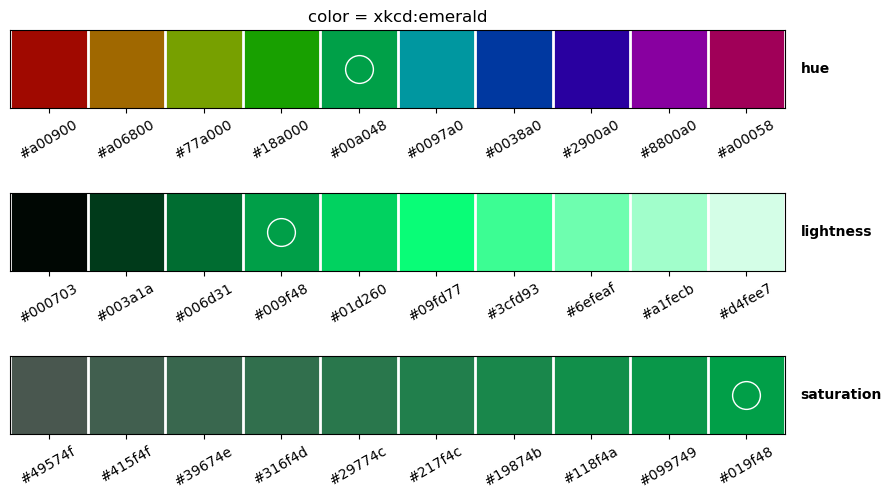

In [3]:
pallete('xkcd:emerald');

hue array:
 ['#ff3d00', '#ffd600', '#8eff00', '#00ff0a', '#00ffa3', '#00c1ff', '#0028ff', '#7000ff', '#ff00f4', '#ff005b']
lightness array:
 ['#322a00', '#655500', '#988000', '#cbab00', '#fed600', '#ffde32', '#ffe665', '#ffef98', '#fff6cb', '#fffefe']
saturation array:
 ['#7f7f7f', '#8c8872', '#999166', '#a59959', '#b2a24c', '#bfab3f', '#cbb333', '#d8bc26', '#e5c519', '#f2ce0c', '#fed700']


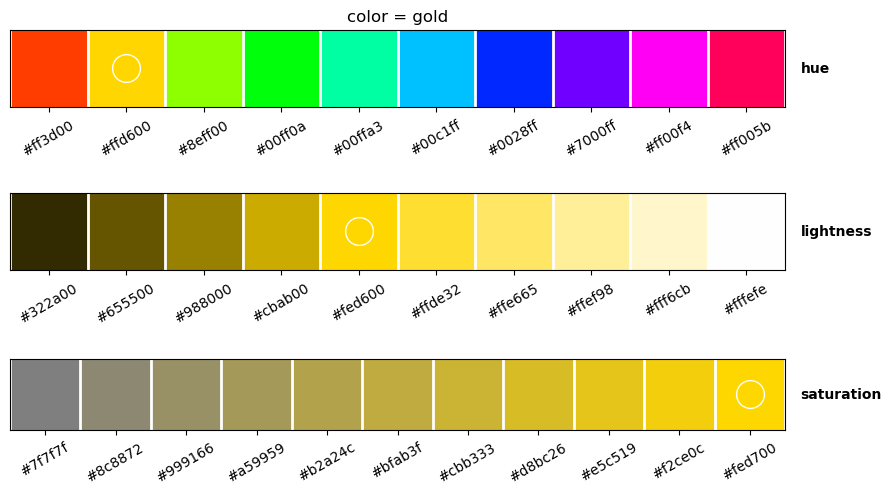

In [4]:
fig = pallete('gold')
fig.savefig('palette-gold.png')

hue array:
 ['#e3ad77', '#d7e377', '#96e377', '#77e397', '#77e3d8', '#77ace3', '#8277e3', '#c377e3', '#e377c2', '#e37781']
lightness array:
 ['#210619', '#4b0f39', '#751859', '#a02079', '#ca2999', '#da4caf', '#e276c1', '#eba1d4', '#f4cbe7', '#fdf5fa']
saturation array:
 ['#b1a8ae', '#baa0b2', '#c297b5', '#ca8fb8', '#d287bb', '#da7fbe', '#e277c1', '#eb6ec5', '#f366c8', '#fb5ecb']


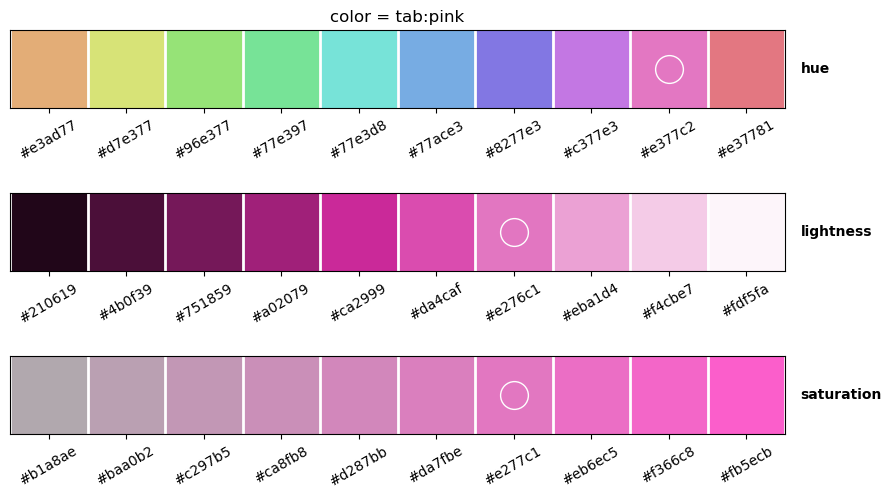

In [5]:
pallete('tab:pink');